In [69]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import scipy.stats as sp
import seaborn as sns  
sns.set_style('darkgrid')

### Orbits


In [4]:
def cycle(v, A, time, shift = 0):
    '''
    v is some input vector
    A is the transition matrix
    time is the number of transitions
    '''
    x = []
    y = []
    t = []
    x.append(v[0])
    y.append(v[1])
    t.append(0)
    for i in range(1, time):
        v = shift+A@v
        #d_v = np.exp(A)@v_prev
        x.append(v[0])
        y.append(v[1])
        t.append(i)
        
    return x, y, t

One method involves generating a matrix using radians to rotate a point about the axes. You can see that both x and y are periodic.

$A = [[cos(r), -sin(r)],[sin(r), cos(r)]]$

[as shown here](https://scipython.com/book/chapter-6-numpy/examples/creating-a-rotation-matrix-in-numpy/)

In [5]:
def two_d_rotation(r):
    theta = np.radians(r)
    c, s = np.cos(theta), np.sin(theta)
    A = np.array(((c, -s), (s, c)))
    return A

A =  [[ 0.93969262 -0.34202014]
 [ 0.34202014  0.93969262]]
initial v =  [-0.5  0. ]


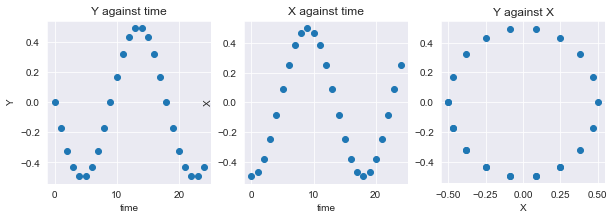

In [26]:
A = two_d_rotation(20)
print("A = ", A)
v = np.array([-0.5,0])
print("initial v = ", v)
time = 25
x,y,t = cycle(v, A, time)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))
ax1.scatter(t, y)
ax1.set_title("Y against time")
ax1.set_xlabel('time')
ax1.set_ylabel('Y')
ax2.scatter(t, x)
ax2.set_title("X against time")
ax2.set_xlabel('time')
ax2.set_ylabel('X')
ax3.scatter(x, y)
ax3.set_title("Y against X")
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax1 = plt.gca()
ax1.set_aspect('equal', adjustable='box')

Another method is to identify a transition matrix that has a complex eigenvalue whose absolute value is 1.

[Example 1](https://personal.math.ubc.ca/~tbjw/ila/dds.html)
[Example 2](https://textbooks.math.gatech.edu/ila/complex-eigenvalues.html)
[Example 3](https://colab.research.google.com/github/NeuromatchAcademy/course-content/blob/main/tutorials/W2D2_LinearSystems/instructor/W2D2_Tutorial1.ipynb#scrollTo=-51CfWP49EP0)

eigenvalues =  [1.86660571e-16+1.j 1.86660571e-16-1.j]
A =  [[ 2 -5]
 [ 1 -2]]
initial v =  [-0.1  0.2]


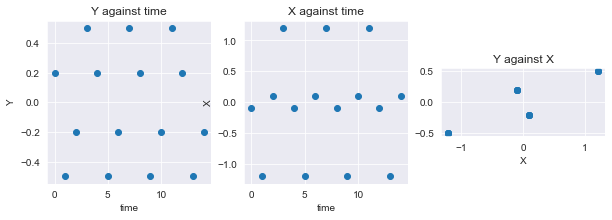

In [67]:
# Basic Example
A = np.array([[2, -5],
              [1, -2]])
val, vec = np.linalg.eig(A)
print("eigenvalues = ", val)
print("A = ", A)
v = np.array([-0.1,0.2])
print("initial v = ", v)
time = 15
x,y,t = cycle(v, A, time)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))
ax1.scatter(t, y)
ax1.set_title("Y against time")
ax1.set_xlabel('time')
ax1.set_ylabel('Y')
ax2.scatter(t, x)
ax2.set_title("X against time")
ax2.set_xlabel('time')
ax2.set_ylabel('X')
ax3.scatter(x, y)
ax3.set_title("Y against X")
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax1 = plt.gca()
ax1.set_aspect('equal', adjustable='box')

eigenvalues =  [-0.545+0.85485379j -0.545-0.85485379j]
A =  [[-3.06 -4.2 ]
 [ 1.68  1.97]]
initial v =  [-3  3]


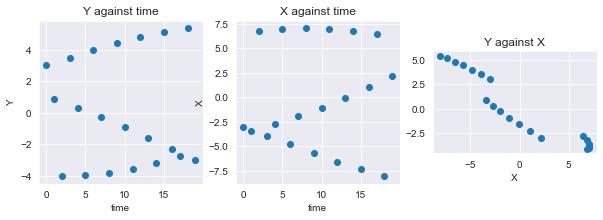

In [32]:
# example matrix from above
A = np.array([[-3.06, -4.2],
              [1.68, 1.97]])
val, vec = np.linalg.eig(A)
print("eigenvalues = ", val)
print("A = ", A)
v = np.array([-3,3])
print("initial v = ", v)
time = 20
x,y,t = cycle(v, A, time)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))
ax1.scatter(t, y)
ax1.set_title("Y against time")
ax1.set_xlabel('time')
ax1.set_ylabel('Y')
ax2.scatter(t, x)
ax2.set_title("X against time")
ax2.set_xlabel('time')
ax2.set_ylabel('X')
ax3.scatter(x, y)
ax3.set_title("Y against X")
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax1 = plt.gca()
ax1.set_aspect('equal', adjustable='box')

At a glance the matrix seems to make an elliptical orbit around the origin, but when we iterate further we see that it is actually spiraling out due to slight imprecision in the matrix. This can be corrected (shown in the next two examples).

eigenvalues =  [-0.545+0.85485379j -0.545-0.85485379j]
A =  [[-3.06 -4.2 ]
 [ 1.68  1.97]]
initial v =  [-3  3]


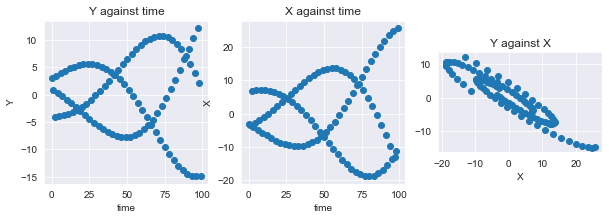

In [63]:
# example matrix from above
A = np.array([[-3.06, -4.2],
              [1.68, 1.97]])
val, vec = np.linalg.eig(A)
print("eigenvalues = ", val)
print("A = ", A)
v = np.array([-3,3])
print("initial v = ", v)
time = 100
x,y,t = cycle(v, A, time)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))
ax1.scatter(t, y)
ax1.set_title("Y against time")
ax1.set_xlabel('time')
ax1.set_ylabel('Y')
ax2.scatter(t, x)
ax2.set_title("X against time")
ax2.set_xlabel('time')
ax2.set_ylabel('X')
ax3.scatter(x, y)
ax3.set_title("Y against X")
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax1 = plt.gca()
ax1.set_aspect('equal', adjustable='box')

Below I try to correct the imprecision, but can only do so well by guessing (sanity check).

eigenvalues =  [-0.54875+0.83624066j -0.54875-0.83624066j]
A =  [[-3.07   -4.2   ]
 [ 1.68    1.9725]]
initial v =  [-0.5  0.5]


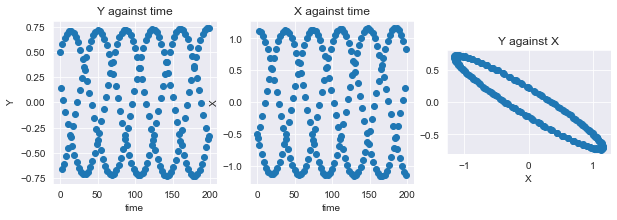

In [66]:
# example matrix from above
A = np.array([[-3.07, -4.2],
              [1.68, 1.9725]])
val, vec = np.linalg.eig(A)
print("eigenvalues = ", val)
print("A = ", A)
v = np.array([-0.5,0.5])
print("initial v = ", v)
time = 200
x,y,t = cycle(v, A, time)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))
ax1.scatter(t, y)
ax1.set_title("Y against time")
ax1.set_xlabel('time')
ax1.set_ylabel('Y')
ax2.scatter(t, x)
ax2.set_title("X against time")
ax2.set_xlabel('time')
ax2.set_ylabel('X')
ax3.scatter(x, y)
ax3.set_title("Y against X")
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax1 = plt.gca()
ax1.set_aspect('equal', adjustable='box')

### Eigenvalues + Eigenvectors to Matrix A
To get around this imprecision issue, we need to exact matrix values derived from eigenvalues and eigenvectors.

In [89]:
# generate eigenvalue that would come from a periodic matrix
def get_val(a=None):
    if not a:
        a = random.uniform(-0.99, 0.99)
    if a > 1 or a < -1:
        raise ValueError("a must be between -0.99 and 0.99")
    a2 = a**2
    b = math.sqrt(1-a2)
    # if you want a complex output
    #eig1 = complex(a, -b)
    #eig2 = complex(a, b)
    return a, b

Using just the eigenvalues, we can achieve a cycle that is not stretched out (simple circle here). You can enter a value for $a$ between -1 and 1 in the function above. Notice how low absolute values result in slow-changing points and high absolute values result in fast-changing points? Given some error, this could be a way to re-init a  2D matrix to move slower/faster i.e. a low error generates a slow moving cycle.

eigenvalues =  [0.01+0.99995j 0.01-0.99995j]
eigenvectors =  [[ 0.        -0.70710678j  0.        +0.70710678j]
 [-0.70710678+0.j         -0.70710678-0.j        ]]
A =  [[ 0.01    -0.99995]
 [ 0.99995  0.01   ]]
initial v =  [-0.5  0.5]


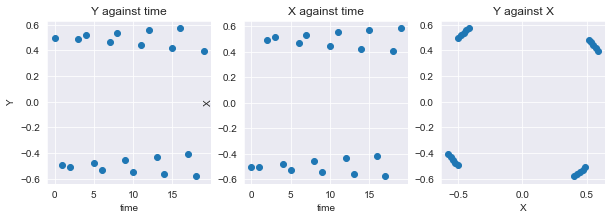

In [98]:

a, b = get_val(0.01)
A = np.array([[a, -b],
              [b, a]])
val, vec = np.linalg.eig(A)
print("eigenvalues = ", val)
print("eigenvectors = ", vec)
print("A = ", A)
v = np.array([-0.5,0.5])
print("initial v = ", v)
time = 20
x,y,t = cycle(v, A, time)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))
ax1.scatter(t, y)
ax1.set_title("Y against time")
ax1.set_xlabel('time')
ax1.set_ylabel('Y')
ax2.scatter(t, x)
ax2.set_title("X against time")
ax2.set_xlabel('time')
ax2.set_ylabel('X')
ax3.scatter(x, y)
ax3.set_title("Y against X")
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax1 = plt.gca()
ax1.set_aspect('equal', adjustable='box')

eigenvalues =  [0.9+0.43588989j 0.9-0.43588989j]
eigenvectors =  [[ 0.        -0.70710678j  0.        +0.70710678j]
 [-0.70710678+0.j         -0.70710678-0.j        ]]
A =  [[ 0.9        -0.43588989]
 [ 0.43588989  0.9       ]]
initial v =  [-0.1  0.1]


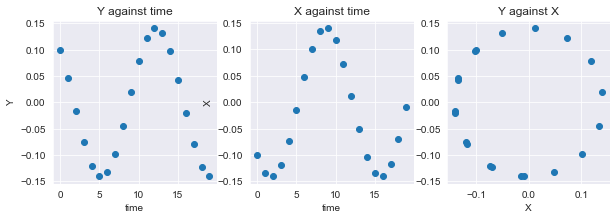

In [123]:

a, b = get_val(0.9)
A = np.array([[a, -b],
              [b, a]])
val, vec = np.linalg.eig(A)
print("eigenvalues = ", val)
print("eigenvectors = ", vec)
print("A = ", A)
v = np.array([-.1,.1])
print("initial v = ", v)
time = 20
x,y,t = cycle(v, A, time)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))
ax1.scatter(t, y)
ax1.set_title("Y against time")
ax1.set_xlabel('time')
ax1.set_ylabel('Y')
ax2.scatter(t, x)
ax2.set_title("X against time")
ax2.set_xlabel('time')
ax2.set_ylabel('X')
ax3.scatter(x, y)
ax3.set_title("Y against X")
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax1 = plt.gca()
ax1.set_aspect('equal', adjustable='box')

What if we want more interesting eigenvectors for the points to rotate about? We can generate a matrix given a random invertibel matrix and our eigenvalues.

eigenvalues =  [0.2+0.9797959j 0.2-0.9797959j]
eigenvectors =  [[ 0.81859825+0.j          0.81859825-0.j        ]
 [-0.45337749-0.35262694j -0.45337749+0.35262694j]]
A =  [[-1.05973758 -2.27452619]
 [ 1.11976674  1.45973758]]
initial v =  [-0.8  0.8]


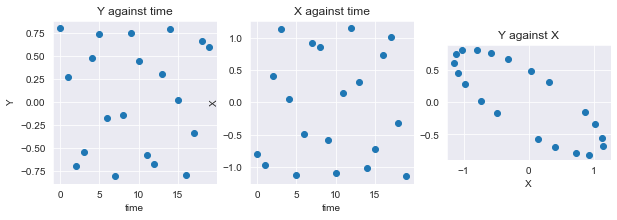

In [126]:
a, b = get_val(0.2)
M = np.array([[a, -b],
              [b, a]])
C = np.array([[4, 1],
              [4, 8]])
Ci = np.linalg.inv(C)
A = Ci@M@C
val, vec = np.linalg.eig(A)
print("eigenvalues = ", val)
print("eigenvectors = ", vec)
print("A = ", A)
v = np.array([-.8,.8])
print("initial v = ", v)
time = 20
x,y,t = cycle(v, A, time)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))
ax1.scatter(t, y)
ax1.set_title("Y against time")
ax1.set_xlabel('time')
ax1.set_ylabel('Y')
ax2.scatter(t, x)
ax2.set_title("X against time")
ax2.set_xlabel('time')
ax2.set_ylabel('X')
ax3.scatter(x, y)
ax3.set_title("Y against X")
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax1 = plt.gca()
ax1.set_aspect('equal', adjustable='box')

### Conclusions
Here we can see that we can generate an orbit by generating a set of complex eigenvalues ($a+ bi, a - bi$) whose squared real ($a$) and imaginary ($b$) components must sum to 1. We simply generate an orbit matrix $M = [[a, -b], [b, a]]$ and apply a change of basis given some random invertable matrix to get us an orbit with a more unique eigenvector:

$A = C^-1MC$

Then, this new matrix can be used to transition us to the next state:

$x_{t+1} = Ax_t$

Moreover, when we initialize our eigenvalues, the value we choose for $a$ dictates how quickly points transition. A high absolute value for $a$ will move the point faster throw the cycle. This means that if we hold our matrix $C$ (determines eigenvectors) across time, at each time step a new set eigenvalues can be computed to dictate how much the priors will move along the cycles path. The only downside to this approach is that the transition matrix must be recomputed at each time step...

The other constraint is that initial input values determine the radius of the cycle, so these need to be carefully considered.